# SARIMAX

In [297]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [298]:
# Changing the path to the root of the repository

if not os.path.exists('data'):
    current_path = os.getcwd()
    root_path = os.path.abspath(os.path.join(current_path, '..'))
    os.chdir(root_path)
    print(f'Changed working directory to: {os.getcwd()}')

In [299]:
df_energy = pd.read_parquet('data/02_processed/parquet/group_4_daily.parquet')
df_energy = df_energy.groupby(['Date','Acorn'])['Conso_kWh'].sum().to_frame()

df_energy = df_energy.reset_index().set_index('Date')
df_energy.head()

# Verificar se todas as datas do índice estão no horário 00:00:00
all_midnight = all(df_energy.index.time == pd.to_datetime('00:00:00').time())
print("Todas as datas estão no horário 00:00:00?" , all_midnight)

Todas as datas estão no horário 00:00:00? True


In [300]:
df_weather = pd.read_parquet('data/01_interim/weather_daily_darksky_cleaned.parquet')
df_weather.index.name = 'Date'

df_weather.head

#all_midnight_weather = all(df_weather.index.time == pd.to_datetime('00:00:00').time())
#print("Todas as datas estão no horário 00:00:00?", all_midnight_weather)

# Pegue os últimos 90 pontos do df_weather em um novo dataframe
df_weather_future = df_weather.tail(79)
df_weather_future.head(79)


,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
Date,,,,,,,,,,,,,,,,,,,
2014-01-12 00:00:00,8.91,147,cloudy,2.78,0.46,3.25,1016.63,4.08,rain,8.27,0.90,2.68,6.06,1.0,5.42,0.38,7.06,-1.79,0.39
2014-01-13 00:00:00,9.72,207,partly-cloudy-day,4.52,0.37,4.00,1005.09,6.50,rain,12.44,0.83,-1.16,6.98,1.0,2.05,5.42,9.01,2.68,0.42
2014-01-14 00:00:00,6.82,247,partly-cloudy-day,1.69,0.29,2.50,1004.33,4.10,rain,13.08,0.81,2.59,4.15,1.0,5.11,2.05,6.82,-1.16,0.45
2014-01-15 00:00:00,11.19,198,partly-cloudy-day,7.91,0.77,4.63,998.57,11.19,rain,9.85,0.90,5.64,11.19,1.0,7.94,6.41,11.19,2.89,0.48
2014-01-16 00:00:00,10.72,191,partly-cloudy-day,6.13,0.58,5.01,990.50,10.17,rain,11.72,0.83,2.83,10.72,1.0,6.43,7.27,10.17,3.91,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27 00:00:00,10.04,75,fog,2.08,0.44,2.36,1012.88,10.04,rain,8.19,0.77,1.69,10.04,3.0,3.85,2.71,10.04,0.62,0.88
2014-03-28 00:00:00,12.43,87,fog,3.67,0.19,3.31,1014.82,12.43,rain,6.24,0.75,5.41,12.43,3.0,7.83,3.85,12.43,1.69,0.92
2014-03-29 00:00:00,18.47,105,clear-day,5.37,0.08,4.19,1014.25,18.47,rain,8.59,0.65,8.14,18.47,4.0,8.53,7.83,18.47,5.41,0.96


In [ ]:
df_weather_future = df_weather_future.drop(columns=[
    'apparentTemperatureHigh',
    'apparentTemperatureMax',
    'temperatureHigh',
    'temperatureLow',
    'apparentTemperatureMin',
    'apparentTemperatureLow',
    'humidity'
])



In [301]:
df_energy_reset = df_energy.reset_index()


df_weather_reset = df_weather.reset_index()

# Fazer o merge usando 'Date' e 'Acorn' como chaves
df = pd.merge(df_energy_reset, df_weather_reset, on='Date', how='inner')

# Se df_weather não tem 'Acorn', o merge será apenas por 'Date' e os dados de Acorn serão replicados para cada linha de weather.
# Se necessário, reordene o índice:
df = df.set_index('Date')



In [302]:
period = df.index.min(), df.index.max()
print(f"Data period: {period[0]} to {period[1]}")

Data period: 2012-10-29 00:00:00 to 2014-01-12 00:00:00


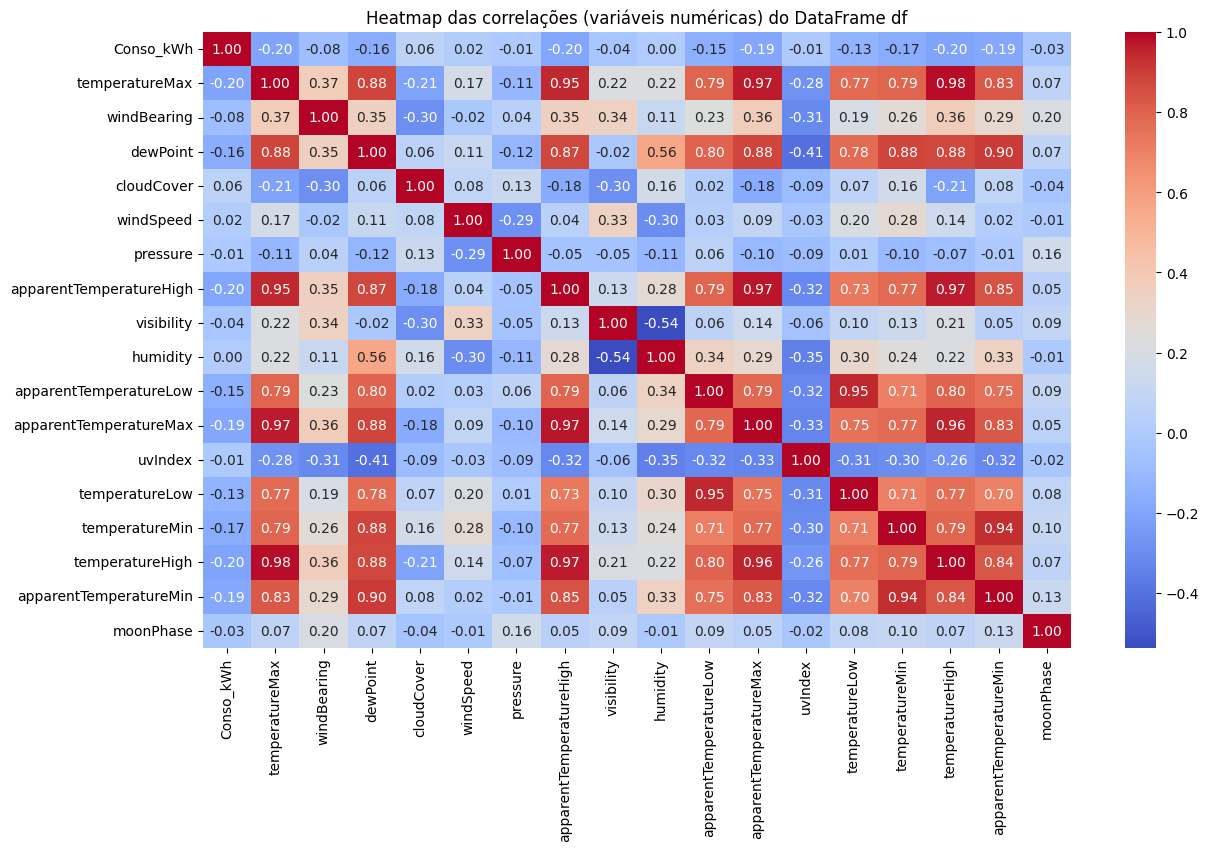

In [303]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap das correlações (variáveis numéricas) do DataFrame df')
plt.show()

In [305]:
df = df.drop(columns=[
    'apparentTemperatureHigh',
    'apparentTemperatureMax',
    'temperatureHigh',
    'temperatureLow',
    'apparentTemperatureMin',
    'apparentTemperatureLow',
    'humidity'
])


KeyError: "['apparentTemperatureHigh', 'apparentTemperatureMax', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureMin', 'apparentTemperatureLow', 'humidity'] not found in axis"

In [184]:
df.head()

,Acorn,Conso_kWh,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,precipType,visibility,uvIndex,temperatureMin,moonPhase
Date,,,,,,,,,,,,,,
2012-07-01,ACORN-C,10.305622,17.58,192,partly-cloudy-day,12.17,0.56,4.51,1015.49,rain,11.97,6.0,12.47,0.45
2012-07-01,ACORN-F,8.158386,17.58,192,partly-cloudy-day,12.17,0.56,4.51,1015.49,rain,11.97,6.0,12.47,0.45
2012-07-01,ACORN-P,5.758356,17.58,192,partly-cloudy-day,12.17,0.56,4.51,1015.49,rain,11.97,6.0,12.47,0.45
2012-07-02,ACORN-C,10.222741,18.81,192,partly-cloudy-day,15.16,0.78,3.64,1013.77,rain,11.54,5.0,15.43,0.49
2012-07-02,ACORN-F,7.956669,18.81,192,partly-cloudy-day,15.16,0.78,3.64,1013.77,rain,11.54,5.0,15.43,0.49


In [185]:
holidays = pd.read_csv('data/00_raw/uk_bank_holidays.csv')
holidays.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [186]:
holidays = pd.to_datetime(holidays['Bank holidays'])

In [307]:
# Option A: Normalize via .dt.normalize() on the Series
df['is_holiday'] = df.index.normalize().isin(holidays.dt.normalize())

df_weather_future['is_holiday'] = df_weather_future.index.normalize().isin(holidays.dt.normalize())

In [308]:
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

df_weather_future['day'] = df_weather_future.index.day
df_weather_future['month'] = df_weather_future.index.month
df_weather_future['dayofweek'] = df_weather_future.index.dayofweek

In [236]:
# Encontrar o último mês disponível nos dados
last_date = df.index.max()
# Definir o início do teste como um mês antes da última data, mantendo o mesmo dia
test_start = last_date.replace(year=2013,month=11, day=12)

# Separar os dados de teste e treinamento para cada grupo ACORN
dfs_train = []
dfs_test = []

for acorn_group, group_df in df.groupby('Acorn'):
    group_test = group_df.loc[(group_df.index >= test_start)]
    group_train = group_df.loc[(group_df.index < test_start)]
    dfs_train.append(group_train)
    dfs_test.append(group_test)

# Concatenar todos os grupos em dois DataFrames finais
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

# Ordenar por índice para manter a ordem cronológica
df_train = df_train.sort_index()
df_test = df_test.sort_index()



In [237]:
feature_cols = [col for col in df_train.columns if col not in ['Conso_kWh']]

X_train = df_train[feature_cols]
y_train = df_train['Conso_kWh']

X_test = df_test[feature_cols]
y_test = df_test['Conso_kWh']


In [326]:
print(f"df_train shape: {df_train.shape}")
print(f"df_test shape: {df_test.shape}")
print(f"dfs_train (per group): {[df.shape for df in dfs_train]}")
print(f"dfs_test (per group): {[df.shape for df in dfs_test]}")

X_test.head()

df_train shape: (1494, 18)
df_test shape: (183, 18)
dfs_train (per group): [(498, 18), (498, 18), (498, 18)]
dfs_test (per group): [(61, 18), (61, 18), (61, 18)]


,Acorn,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,precipType,visibility,uvIndex,temperatureMin,moonPhase,is_holiday,day,month,dayofweek
Date,,,,,,,,,,,,,,,,,
2013-11-12,ACORN-C,13.11,313,partly-cloudy-day,8.19,0.56,2.26,1026.13,rain,9.91,1.0,6.08,0.33,0,12,11,1
2013-11-12,ACORN-F,13.11,313,partly-cloudy-day,8.19,0.56,2.26,1026.13,rain,9.91,1.0,6.08,0.33,0,12,11,1
2013-11-12,ACORN-P,13.11,313,partly-cloudy-day,8.19,0.56,2.26,1026.13,rain,9.91,1.0,6.08,0.33,0,12,11,1
2013-11-13,ACORN-C,9.94,234,partly-cloudy-day,3.22,0.45,2.30,1032.00,rain,12.99,1.0,2.11,0.37,0,13,11,2
2013-11-13,ACORN-F,9.94,234,partly-cloudy-day,3.22,0.45,2.30,1032.00,rain,12.99,1.0,2.11,0.37,0,13,11,2


In [259]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train['is_holiday'] = X_train['is_holiday'].astype(int)
X_test['is_holiday'] = X_test['is_holiday'].astype(int)

numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"  # drop anything not listed above
)

C:\Users\gusta\AppData\Local\Temp\ipykernel_128004\2245935198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['is_holiday'] = X_train['is_holiday'].astype(int)
C:\Users\gusta\AppData\Local\Temp\ipykernel_128004\2245935198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['is_holiday'] = X_test['is_holiday'].astype(int)


# LSTM


In [351]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Function to create sequences for LSTM
# Required for use in the second block of code
lstm_features = numerical_features.copy()

def create_sequences(X, y, seq_length):
    xs, ys = [], []
    for i in range(len(X) - seq_length):
        xs.append(X[i:(i + seq_length)])
        ys.append(y[i + seq_length])
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

# LSTM model with PyTorch
# Required for use in the second block of code

class LSTMModel(nn.Module):
    def __init__(self, n_features, hidden_dim=64, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(hidden_dim, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out.squeeze()

# Definition of device for training (CPU or GPU)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



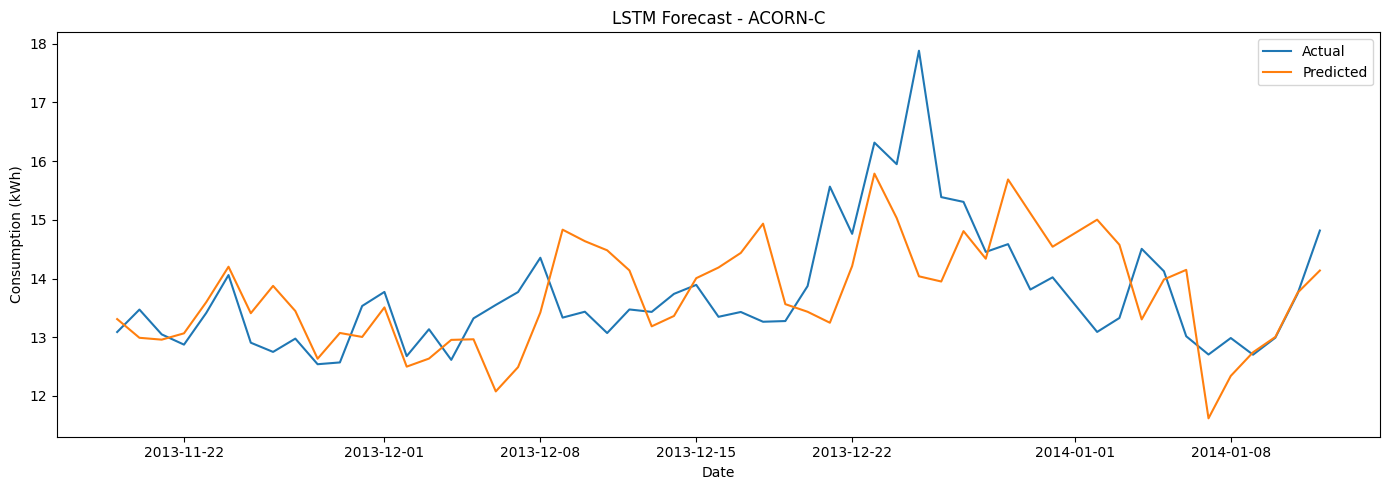

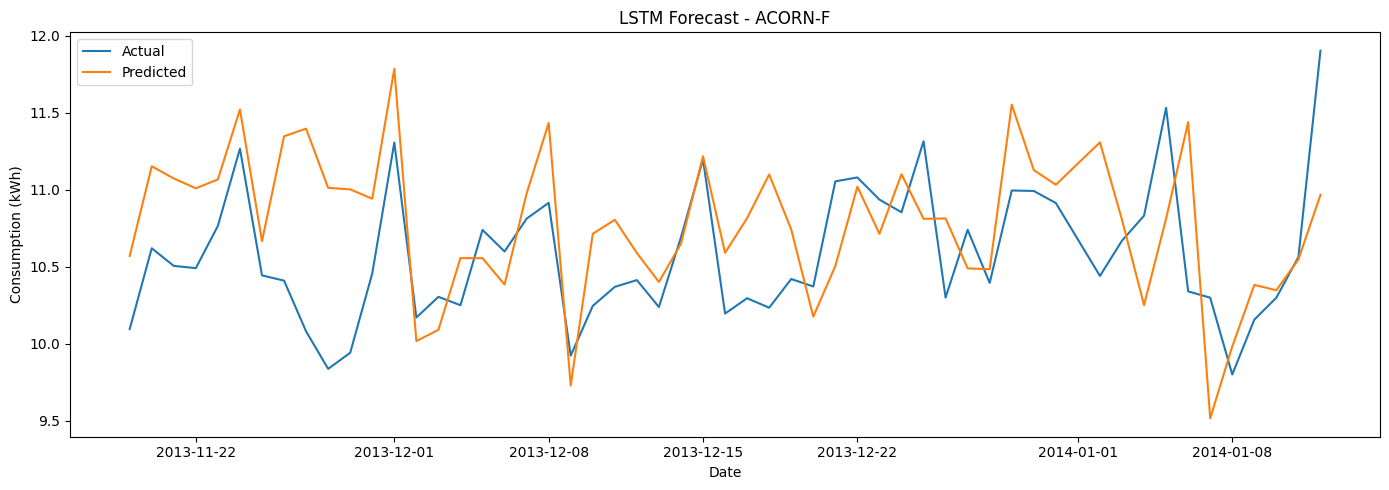

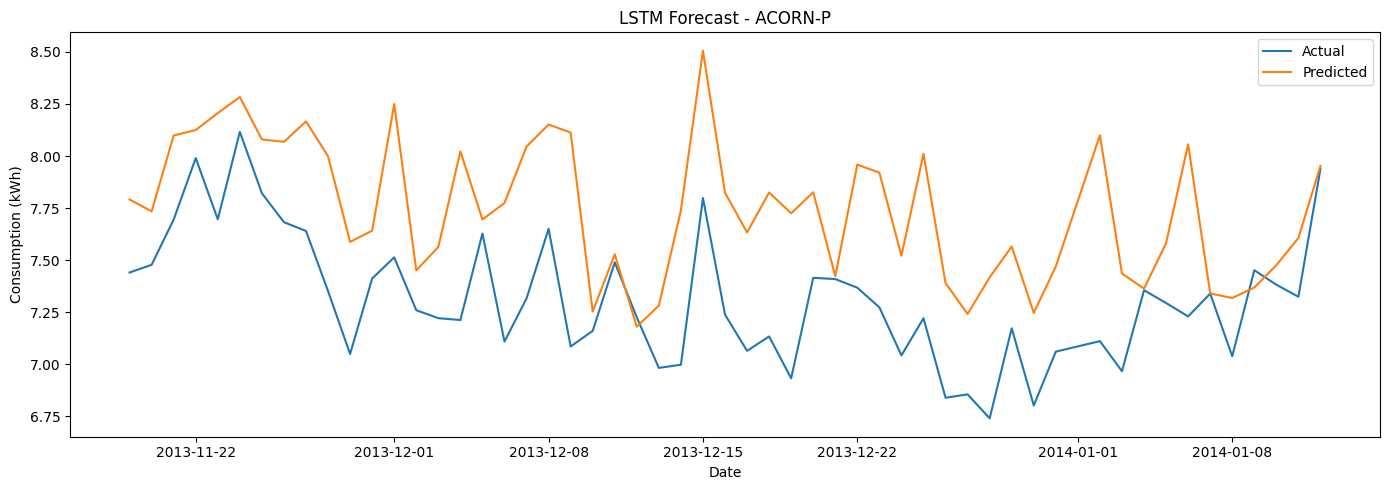

In [352]:
lstm_models = {}  # Dicionário para armazenar os modelos

results_lstm = {}

for acorn_label, train_df, test_df in zip(['ACORN-C', 'ACORN-F', 'ACORN-P'], dfs_train, dfs_test):
    # Prepare features and target
    X_train_group = train_df[lstm_features]
    y_train_group = train_df['Conso_kWh']
    X_test_group = test_df[lstm_features]
    y_test_group = test_df['Conso_kWh']

    # Scale features
    scaler_group = MinMaxScaler()
    X_train_scaled = scaler_group.fit_transform(X_train_group)
    X_test_scaled = scaler_group.transform(X_test_group)

    # Create sequences
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_group.values, n_input)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_group.values, n_input)

    train_dataset = TensorDataset(X_train_seq, y_train_seq)
    test_dataset = TensorDataset(X_test_seq, y_test_seq)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    # Model
    model = LSTMModel(n_features).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train
    for epoch in range(1000):  # Fewer epochs for demo; adjust as needed
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()

    # Test
    model.eval()
    preds = []
    with torch.no_grad():
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            output = model(X_batch)
            preds.append(output.cpu().numpy())
    y_pred = np.array(preds).flatten()

    # Store results
    results_lstm[acorn_label] = {
        'y_true': y_test_seq.numpy(),
        'y_pred': y_pred
    }
    # Salve o modelo treinado para uso futuro
    lstm_models[acorn_label] = model

# Example plot for each group
for i, (acorn_label, res) in enumerate(results_lstm.items()):
    # Get the corresponding test DataFrame for dates
    test_df_group = dfs_test[i]
    # The number of predictions is len(res['y_pred']), so align with the last N dates of test_df_group
    dates = test_df_group.index[-len(res['y_pred']):]
    plt.figure(figsize=(14, 5))
    plt.plot(dates, res['y_true'], label='Actual')
    plt.plot(dates, res['y_pred'], label='Predicted')
    plt.title(f'LSTM Forecast - {acorn_label}')
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

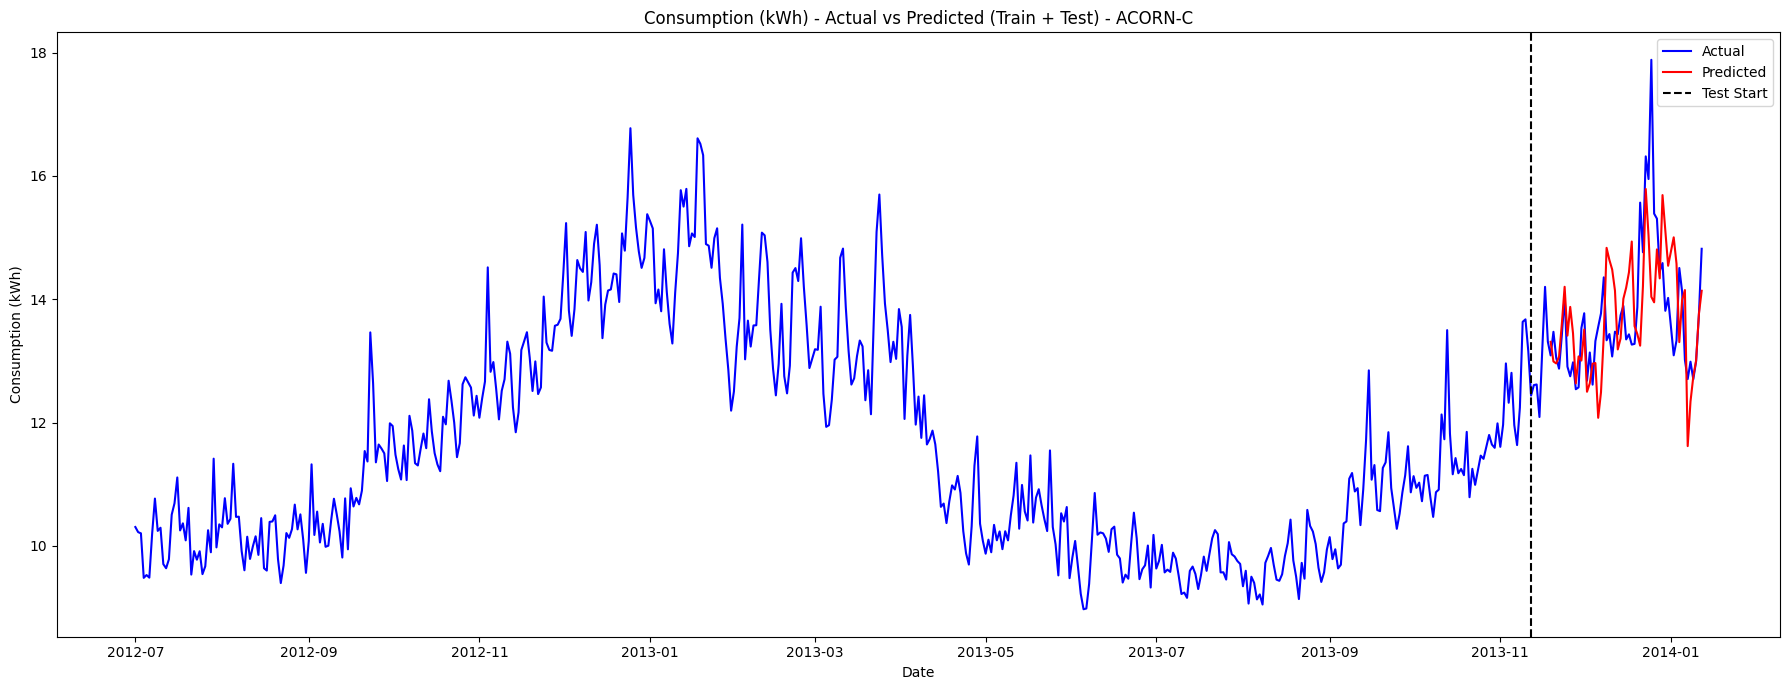

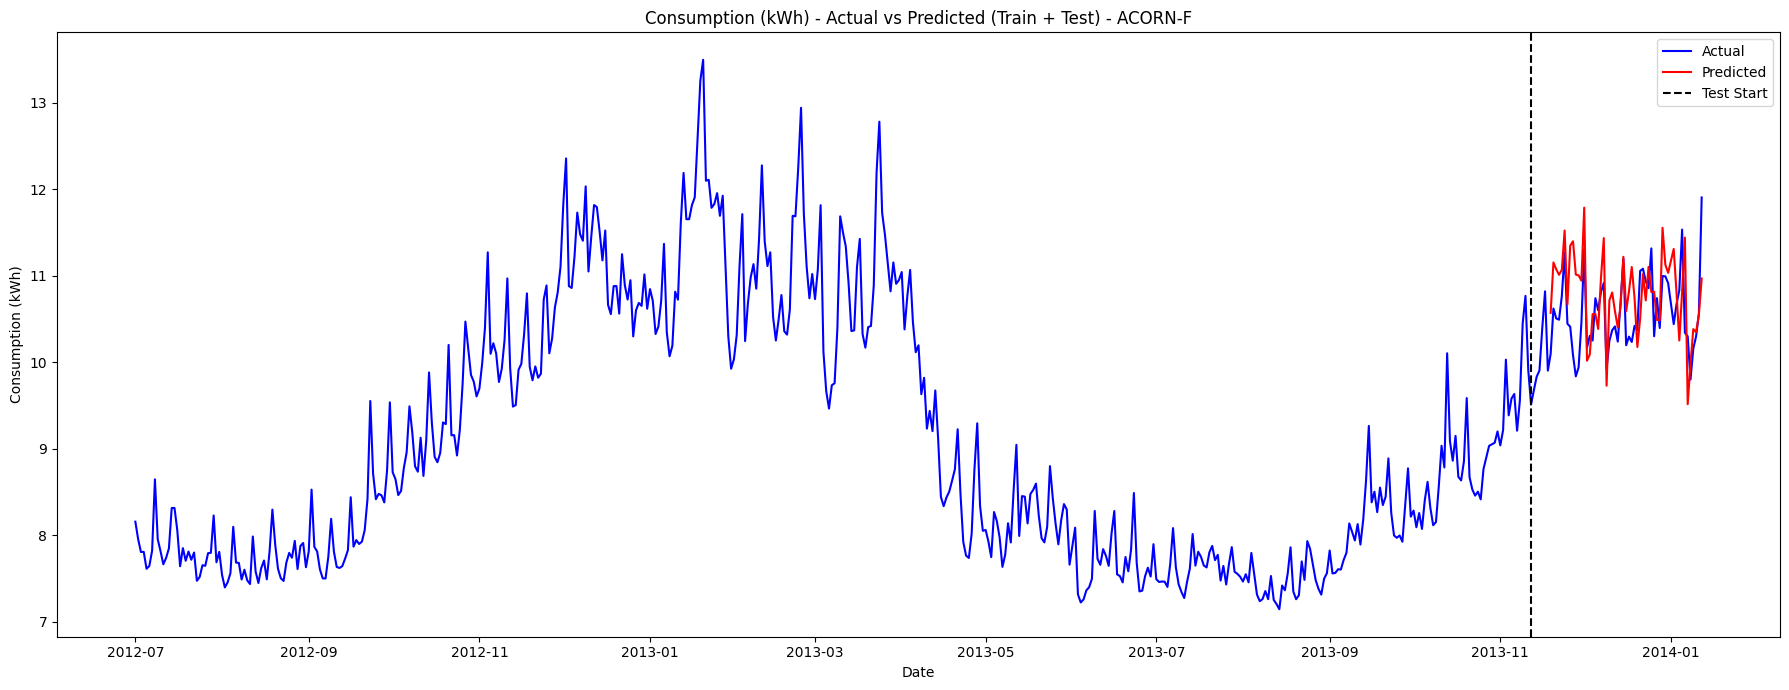

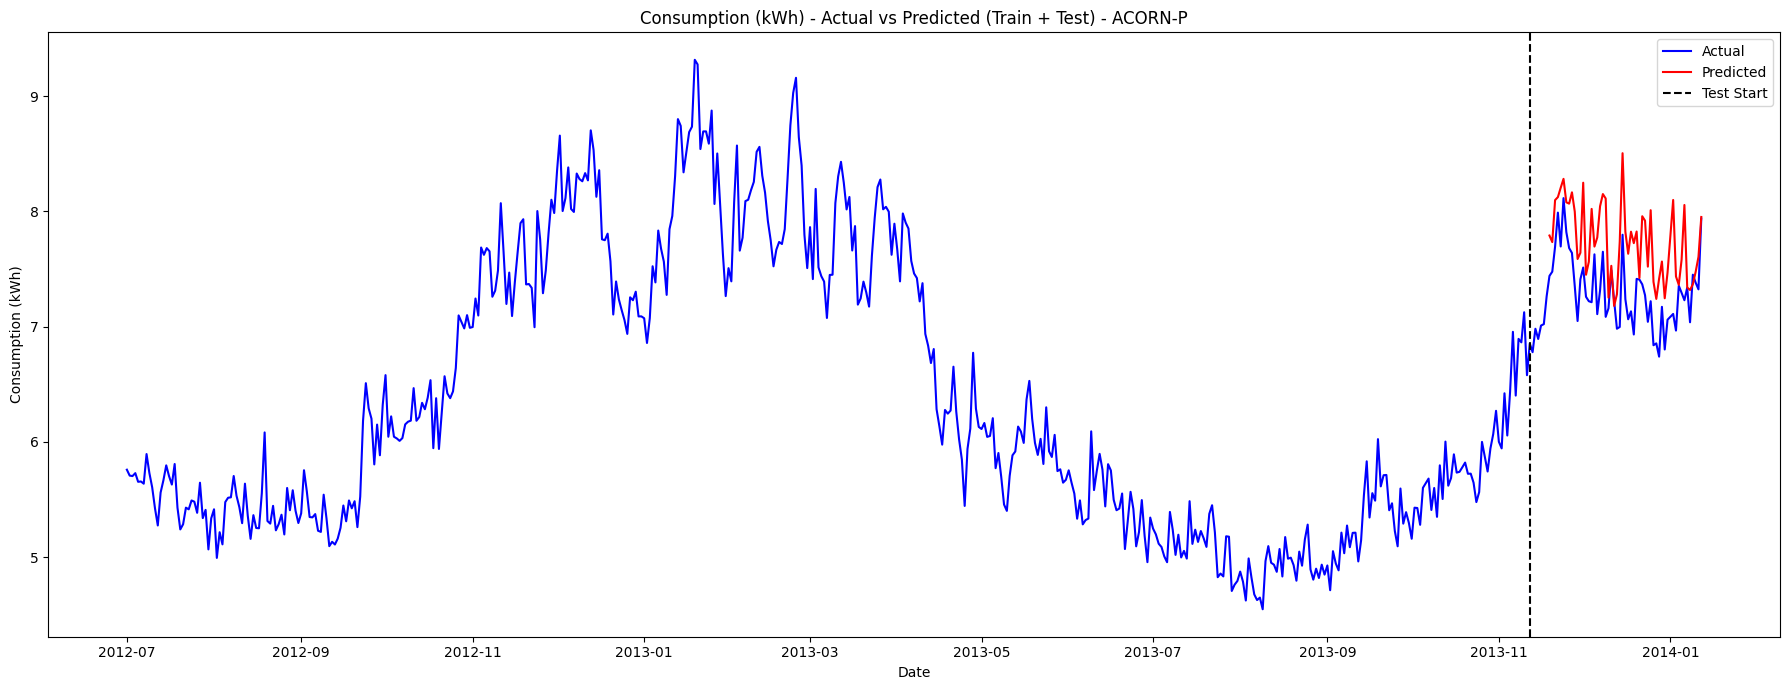

In [353]:
# Plot para os outros grupos ACORN
for acorn_label in results_lstm:
    y_true = results_lstm[acorn_label]['y_true']
    y_pred = results_lstm[acorn_label]['y_pred']
    # Obtenha os DataFrames de treino e teste correspondentes
    train_df_group = dfs_train[['ACORN-C', 'ACORN-F', 'ACORN-P'].index(acorn_label)]
    test_df_group = dfs_test[['ACORN-C', 'ACORN-F', 'ACORN-P'].index(acorn_label)]

    full_dates = np.concatenate([train_df_group.index, test_df_group.index])
    full_true = np.concatenate([train_df_group['Conso_kWh'], test_df_group['Conso_kWh']])
    y_pred_full = np.full(len(full_true), np.nan)
    y_pred_full[-len(y_pred):] = y_pred

    plt.figure(figsize=(18, 7))
    plt.plot(full_dates, full_true, label='Actual', color='blue')
    plt.plot(full_dates[-len(y_pred):], y_pred, label='Predicted', color='red')
    plt.axvline(test_df_group.index[0], color='black', linestyle='--', label='Test Start')
    plt.title(f'Consumption (kWh) - Actual vs Predicted (Train + Test) - {acorn_label}')
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [354]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import numpy as np

metrics = {}

for acorn_label, res in results_lstm.items():
    y_true = res['y_true']
    y_pred = res['y_pred']
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[acorn_label] = {'MAPE': mape, 'MSE': mse, 'RMSE': rmse}

for acorn_label, vals in metrics.items():
    print(f"{acorn_label}: MAPE={vals['MAPE']*100:.2f}%, MSE={vals['MSE']:.4f}, RMSE={vals['RMSE']:.4f}")


ACORN-C: MAPE=5.39%, MSE=1.0401, RMSE=1.0199
ACORN-F: MAPE=4.00%, MSE=0.2782, RMSE=0.5275
ACORN-P: MAPE=5.93%, MSE=0.2563, RMSE=0.5062


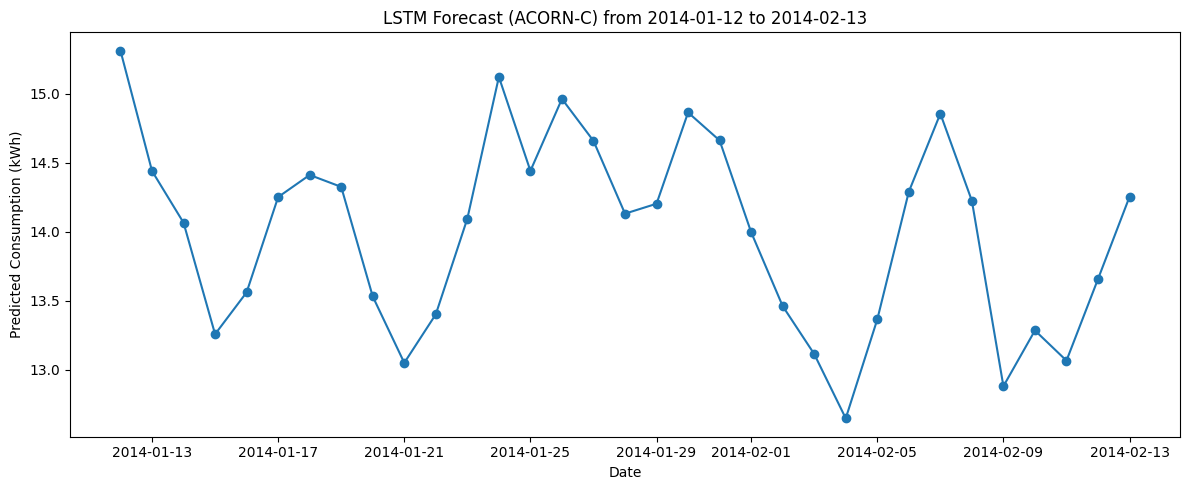

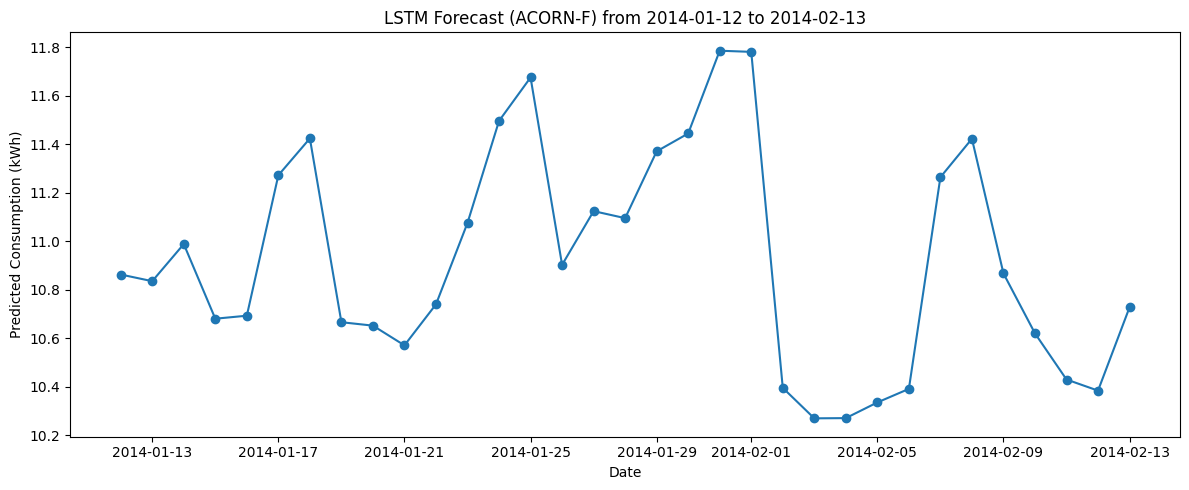

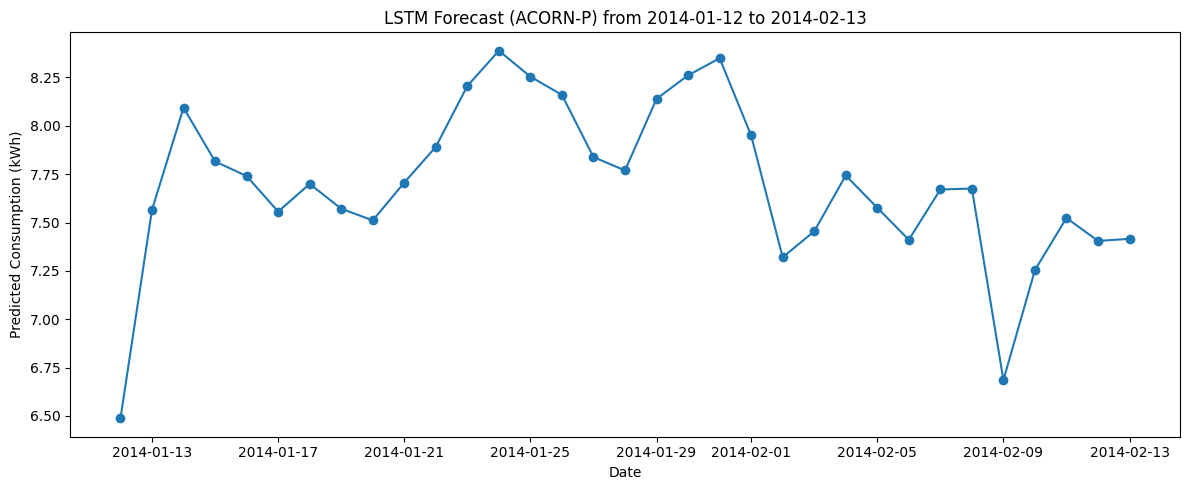

,ACORN-C,ACORN-F,ACORN-P
Date,,,
2014-01-12,15.313908,10.862082,6.487683
2014-01-13,14.441227,10.834661,7.566125
2014-01-14,14.065816,10.987699,8.093243
2014-01-15,13.256827,10.679893,7.815750
2014-01-16,13.560481,10.692252,7.740220


In [355]:
from datetime import datetime

# Define future forecast dates
future_start = datetime(2014, 1, 12)
future_end = datetime(2014, 2, 13)
future_dates = pd.date_range(start=future_start, end=future_end, freq='D')

future_forecasts = {}

for acorn_label, train_df, test_df in zip(['ACORN-C', 'ACORN-F', 'ACORN-P'], dfs_train, dfs_test):
    # Concatenate all available history
    full_df = pd.concat([train_df, test_df])
    # Select only the features used in the LSTM
    X_full = full_df[lstm_features].copy()
    y_full = full_df['Conso_kWh']

    # Fit scaler with all history
    scaler = MinMaxScaler()
    X_full_scaled = scaler.fit_transform(X_full)

    # Get the last input window for rolling forecast
    last_window = X_full_scaled[-n_input:]

    # Prepare future features for the group
    X_future = df_weather_future[lstm_features].copy()
    # If df_weather_future does not have the 'Acorn' column, replicate for each group
    if 'Acorn' in X_future.columns:
        X_future_group = X_future[X_future['Acorn'] == acorn_label].copy()
    else:
        X_future_group = X_future.copy()
    X_future_group = X_future_group.loc[future_dates]

    # Normalize future features with the same scaler
    X_future_scaled = scaler.transform(X_future_group)

    # Use the last trained model for the group
    model = lstm_models[acorn_label]
    model.eval()

    preds = []
    window = last_window.copy()
    for i in range(len(future_dates)):
        # Replace the last row of the window with the future features for the corresponding day
        window_next = window.copy()
        window_next[-1] = X_future_scaled[i]
        X_input = torch.tensor(window_next, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            pred = model(X_input).cpu().item()
        preds.append(pred)
        # Update window: remove the oldest and add the future features of the next day
        if i + 1 < len(X_future_scaled):
            window = np.vstack([window[1:], X_future_scaled[i+1]])
        else:
            window = np.vstack([window[1:], X_future_scaled[i]])

    # Save predictions
    future_forecasts[acorn_label] = pd.Series(preds, index=future_dates)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(future_dates, preds, marker='o')
    plt.title(f'LSTM Forecast ({acorn_label}) from {future_start.date()} to {future_end.date()}')
    plt.xlabel('Date')
    plt.ylabel('Predicted Consumption (kWh)')
    plt.tight_layout()
    plt.show()

# Concatenar previsões futuras de todos os grupos em um único DataFrame
future_forecasts_lstm_df = pd.DataFrame(future_forecasts)
future_forecasts_lstm_df.index.name = 'Date'
future_forecasts_lstm_df.head()

In [ ]:
# Plot for each ACORN group: 6 months before the prediction period, test, and LSTM (non-rolling) forecast

from datetime import timedelta

for acorn_label in ['ACORN-C', 'ACORN-F', 'ACORN-P']:
    # Get the future forecast and test results
    y_future = future_forecasts_lstm_df[acorn_label]
    test_res = results_lstm[acorn_label]
    
    # Get the test DataFrame for this group
    idx = ['ACORN-C', 'ACORN-F', 'ACORN-P'].index(acorn_label)
    test_df_group = dfs_test[idx]
    train_df_group = dfs_train[idx]
    
    # Define the plotting window: 6 months before the first prediction
    plot_start = y_future.index[0] - pd.DateOffset(months=6)
    plot_end = y_future.index[-1]
    
    # Concatenate train and test for the full actual series
    full_df = pd.concat([train_df_group, test_df_group])
    full_df = full_df.sort_index()
    mask = (full_df.index >= plot_start) & (full_df.index <= plot_end)
    full_df_plot = full_df.loc[mask]
    
    # For test predictions (results_lstm), align with test dates
    test_pred_dates = test_df_group.index[-len(test_res['y_pred']):]
    y_pred_test = pd.Series(test_res['y_pred'], index=test_pred_dates)
    
    plt.figure(figsize=(18, 7))
    plt.plot(full_df_plot.index, full_df_plot['Conso_kWh'], label='Actual', color='blue')
    plt.plot(y_pred_test.index, y_pred_test.values, label='Test Prediction (LSTM)', color='orange')
    plt.plot(y_future.index, y_future.values, label='Future Forecast (LSTM)', color='red', marker='o')
    plt.axvline(y_future.index[0], color='black', linestyle='--', label='Forecast Start')
    plt.title(f'Consumption (kWh) - Actual vs LSTM Forecast - {acorn_label}')
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Rolling Forecast LSTM

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


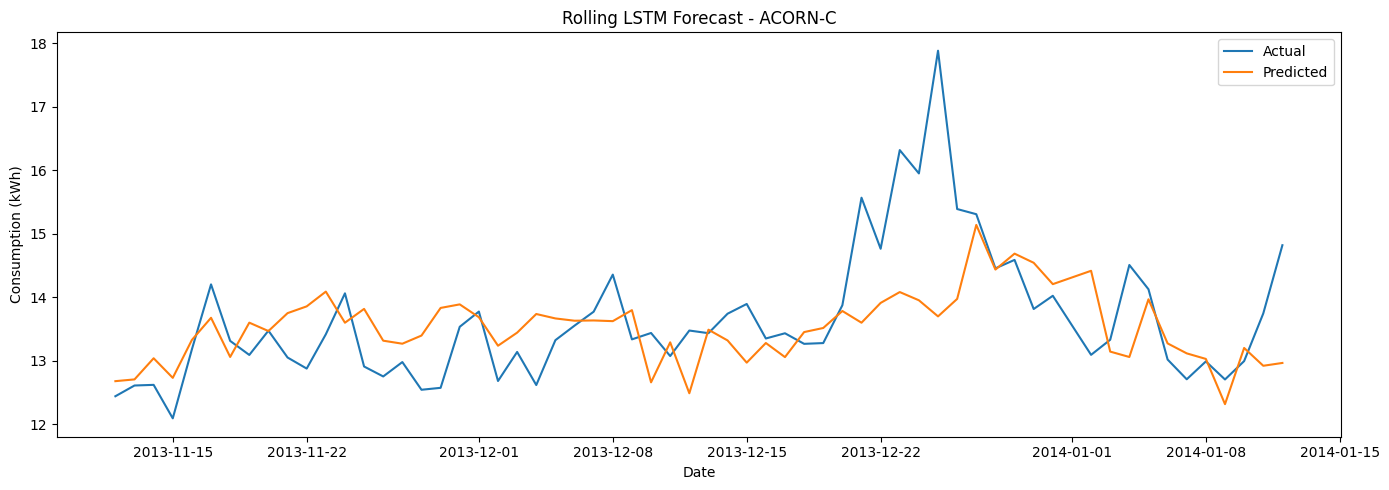

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


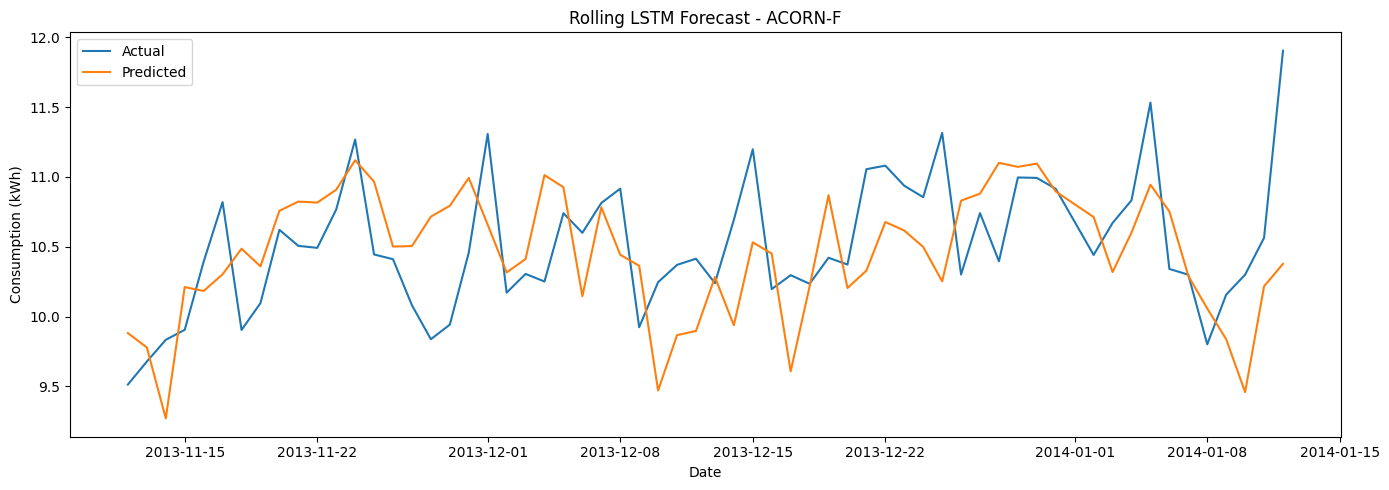

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


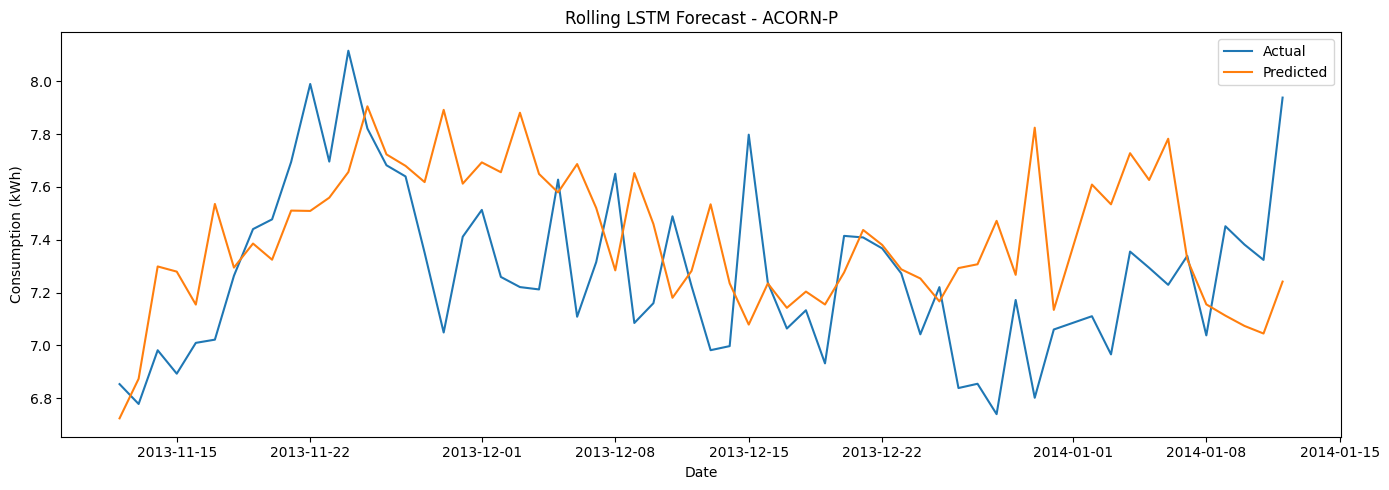

In [356]:
lstmRF_models = {}

# Rolling forecast for each ACORN group
results_lstmRF = {}
n_input = 7  # days of history
for acorn_label, train_df, test_df in zip(['ACORN-C', 'ACORN-F', 'ACORN-P'], dfs_train, dfs_test):
    # Prepare features and target for rolling forecast
    X_all = pd.concat([train_df[lstm_features], test_df[lstm_features]])
    y_all = pd.concat([train_df['Conso_kWh'], test_df['Conso_kWh']])

    # Scale features
    scaler_group = MinMaxScaler()
    X_all_scaled = scaler_group.fit_transform(X_all)

    # Create sequences for all data
    X_seq_all, y_seq_all = create_sequences(X_all_scaled, y_all.values, n_input)

    # Determine split index for rolling (train initial length)
    split_idx = len(train_df) - n_input
    n_total = len(X_seq_all)
    n_steps_rolling = n_total - split_idx

    all_preds = []
    all_targets = []

    X_train_roll = X_seq_all[:split_idx]
    y_train_roll = y_seq_all[:split_idx]

    # We'll keep the last trained model for each ACORN group
    model = None

    for step in range(n_steps_rolling):
        model = LSTMModel(len(lstm_features)).to(device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_ds = TensorDataset(X_train_roll, y_train_roll)
        train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

        n_epochs_inside = 50
        model.train()
        for epoch in range(n_epochs_inside):
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                output = model(X_batch)
                loss = criterion(output, y_batch)
                loss.backward()
                optimizer.step()

        model.eval()
        X_next = X_seq_all[split_idx + step:split_idx + step + 1].to(device)
        with torch.no_grad():
            pred_next = model(X_next).cpu().item()

        true_next = y_seq_all[split_idx + step].item()
        all_preds.append(pred_next)
        all_targets.append(true_next)

        X_train_roll = torch.cat([X_train_roll, X_seq_all[split_idx + step:split_idx + step + 1]], dim=0)
        y_train_roll = torch.cat([y_train_roll, y_seq_all[split_idx + step:split_idx + step + 1]], dim=0)

    # Save the last trained model for this ACORN group
    lstmRF_models[acorn_label] = model

    results_lstmRF[acorn_label] = {
        'y_true': np.array(all_targets),
        'y_pred': np.array(all_preds)
    }

    dates = test_df.index[-len(all_preds):]
    plt.figure(figsize=(14, 5))
    plt.plot(dates, all_targets, label='Actual')
    plt.plot(dates, all_preds, label='Predicted')
    plt.title(f'Rolling LSTM Forecast - {acorn_label}')
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()



In [357]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import numpy as np

# Example: for a single result (e.g., y_true and y_pred from results[acorn_label])
# Replace y_pred with your predictions array for each group

metrics = {}

for acorn_label, res in results_lstmRF.items():
    y_true = res['y_true']
    y_pred = res['y_pred']
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[acorn_label] = {'MAPE': mape, 'MSE': mse, 'RMSE': rmse}

for acorn_label, vals in metrics.items():
    print(f"{acorn_label}: MAPE={vals['MAPE']*100:.2f}%, MSE={vals['MSE']:.4f}, RMSE={vals['RMSE']:.4f}")

ACORN-C: MAPE=4.50%, MSE=0.8968, RMSE=0.9470
ACORN-F: MAPE=3.88%, MSE=0.2516, RMSE=0.5016
ACORN-P: MAPE=4.07%, MSE=0.1423, RMSE=0.3773


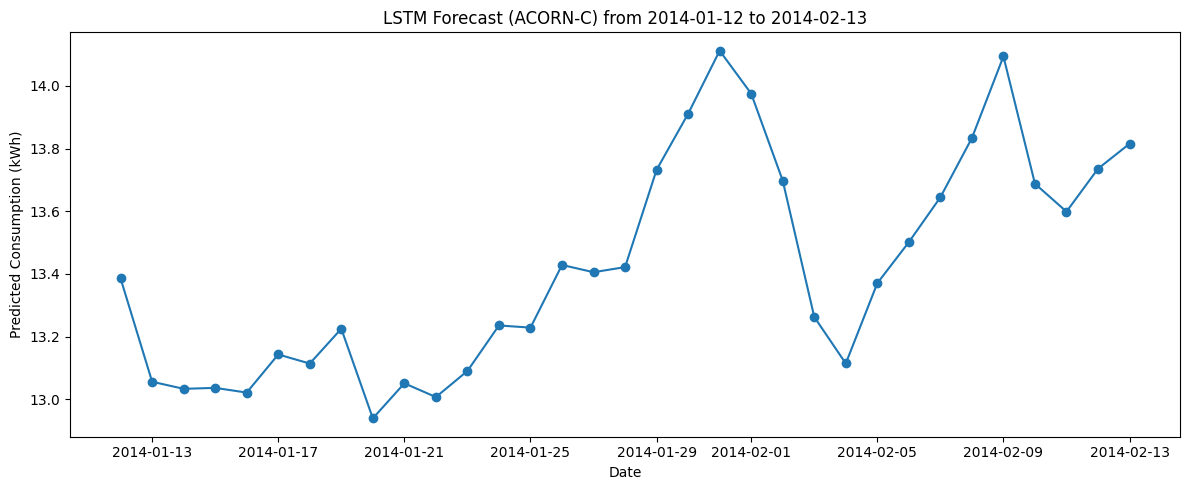

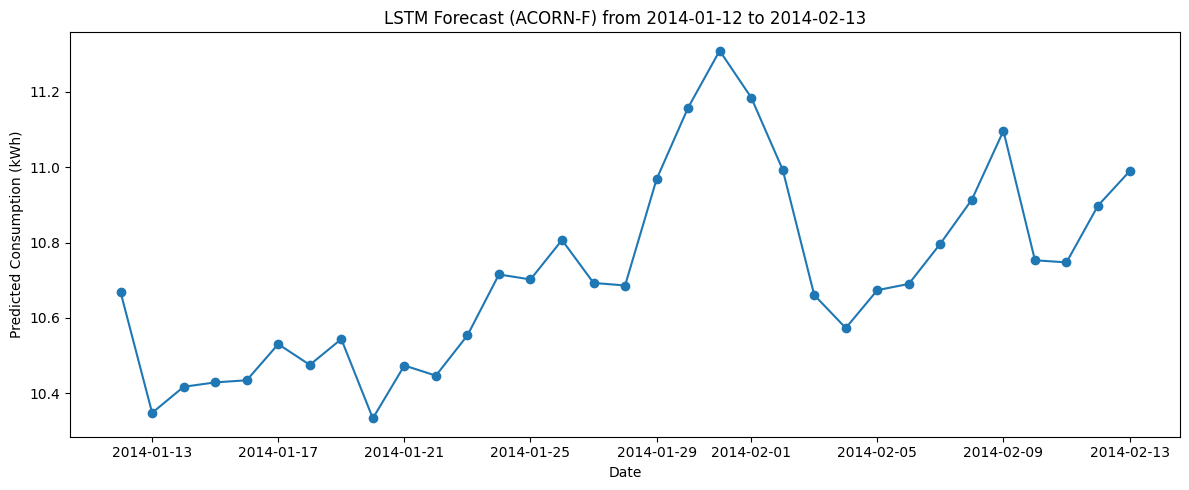

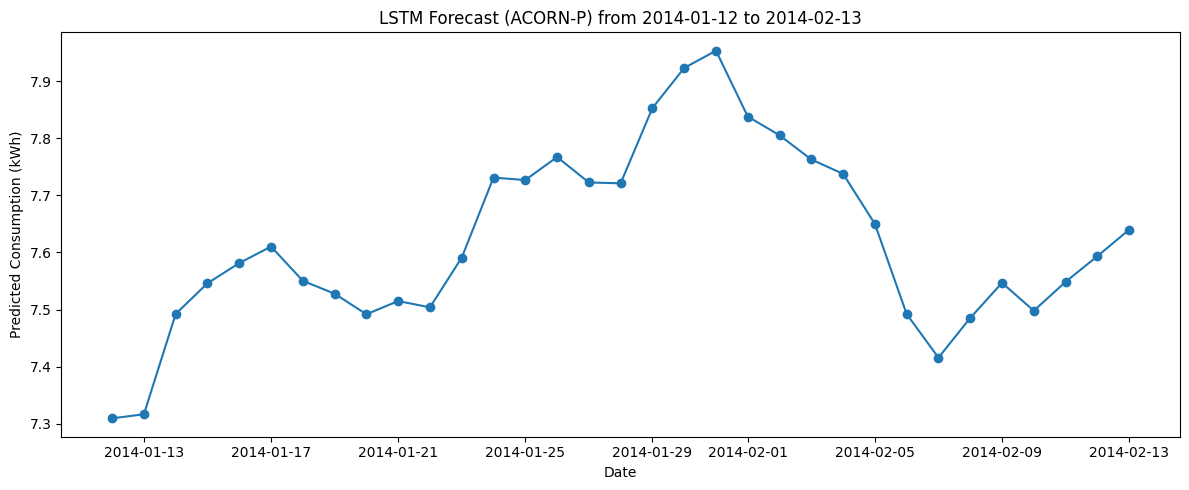

,ACORN-C,ACORN-F,ACORN-P
Date,,,
2014-01-12,13.385410,10.667942,7.309140
2014-01-13,13.055776,10.347478,7.316298
2014-01-14,13.033191,10.416747,7.492227
2014-01-15,13.036195,10.428387,7.545946
2014-01-16,13.021198,10.434018,7.581436


In [358]:
from datetime import datetime

# Define future forecast dates
future_start = datetime(2014, 1, 12)
future_end = datetime(2014, 2, 13)
future_dates = pd.date_range(start=future_start, end=future_end, freq='D')

future_forecasts = {}

for acorn_label, train_df, test_df in zip(['ACORN-C', 'ACORN-F', 'ACORN-P'], dfs_train, dfs_test):
    # Concatenate all available history
    full_df = pd.concat([train_df, test_df])
    # Select only the features used in the LSTM
    X_full = full_df[lstm_features].copy()
    y_full = full_df['Conso_kWh']

    # Fit scaler with all history
    scaler = MinMaxScaler()
    X_full_scaled = scaler.fit_transform(X_full)

    # Get the last input window for rolling forecast
    last_window = X_full_scaled[-n_input:]

    # Prepare future features for the group
    X_future = df_weather_future[lstm_features].copy()
    # If df_weather_future does not have the 'Acorn' column, replicate for each group
    if 'Acorn' in X_future.columns:
        X_future_group = X_future[X_future['Acorn'] == acorn_label].copy()
    else:
        X_future_group = X_future.copy()
    X_future_group = X_future_group.loc[future_dates]

    # Normalize future features with the same scaler
    X_future_scaled = scaler.transform(X_future_group)

    # Use the last trained model for the group
    model = lstmRF_models[acorn_label]
    model.eval()

    preds = []
    window = last_window.copy()
    for i in range(len(future_dates)):
        # Replace the last row of the window with the future features for the corresponding day
        window_next = window.copy()
        window_next[-1] = X_future_scaled[i]
        X_input = torch.tensor(window_next, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            pred = model(X_input).cpu().item()
        preds.append(pred)
        # Update window: remove the oldest and add the future features of the next day
        if i + 1 < len(X_future_scaled):
            window = np.vstack([window[1:], X_future_scaled[i+1]])
        else:
            window = np.vstack([window[1:], X_future_scaled[i]])

    # Save predictions
    future_forecasts[acorn_label] = pd.Series(preds, index=future_dates)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(future_dates, preds, marker='o')
    plt.title(f'LSTM Forecast ({acorn_label}) from {future_start.date()} to {future_end.date()}')
    plt.xlabel('Date')
    plt.ylabel('Predicted Consumption (kWh)')
    plt.tight_layout()
    plt.show()

# Concatenar previsões futuras de todos os grupos em um único DataFrame
future_forecasts_lstmRF_df = pd.DataFrame(future_forecasts)
future_forecasts_lstmRF_df.index.name = 'Date'
future_forecasts_lstmRF_df.head()

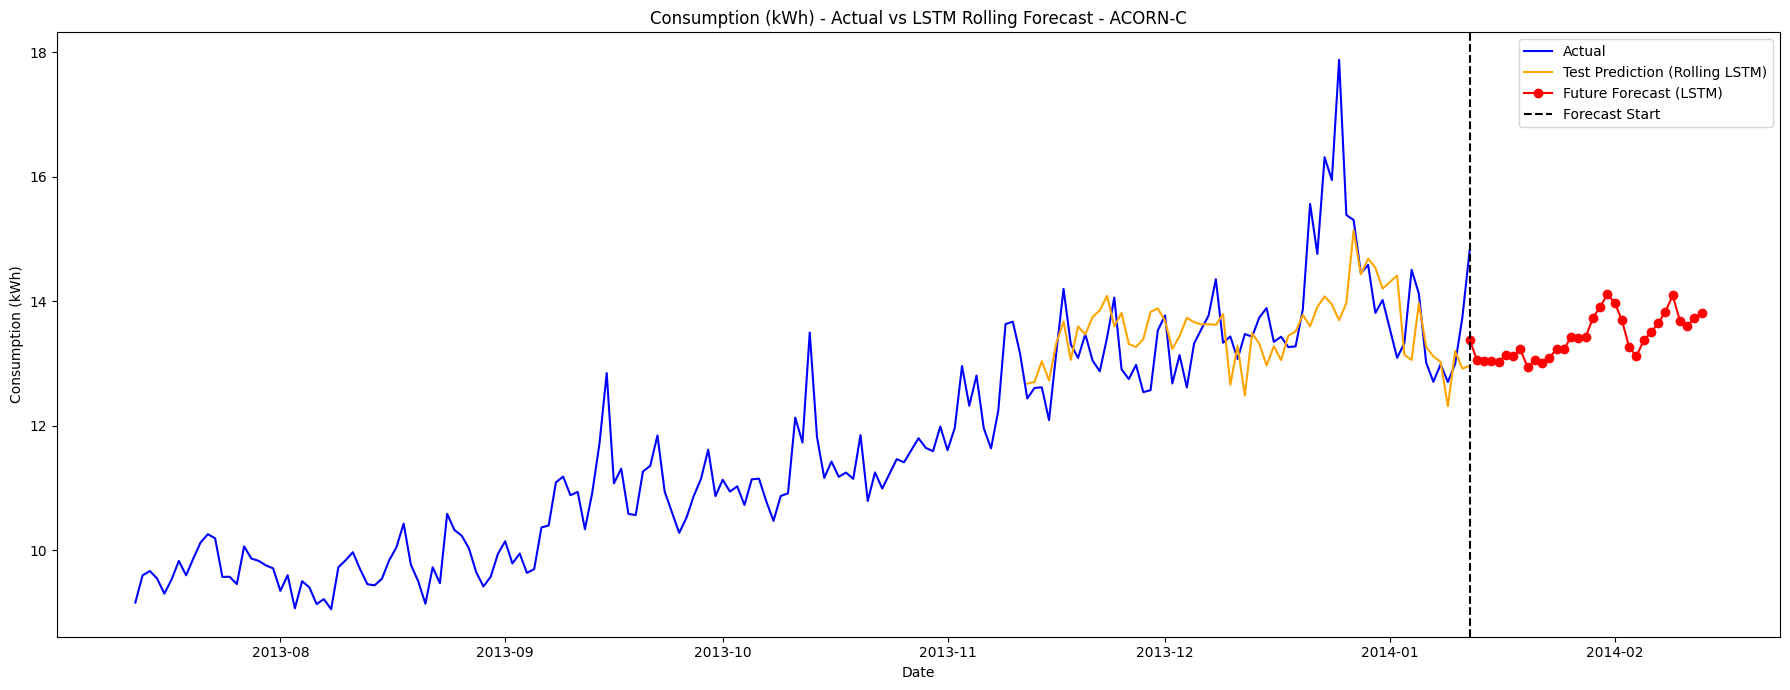

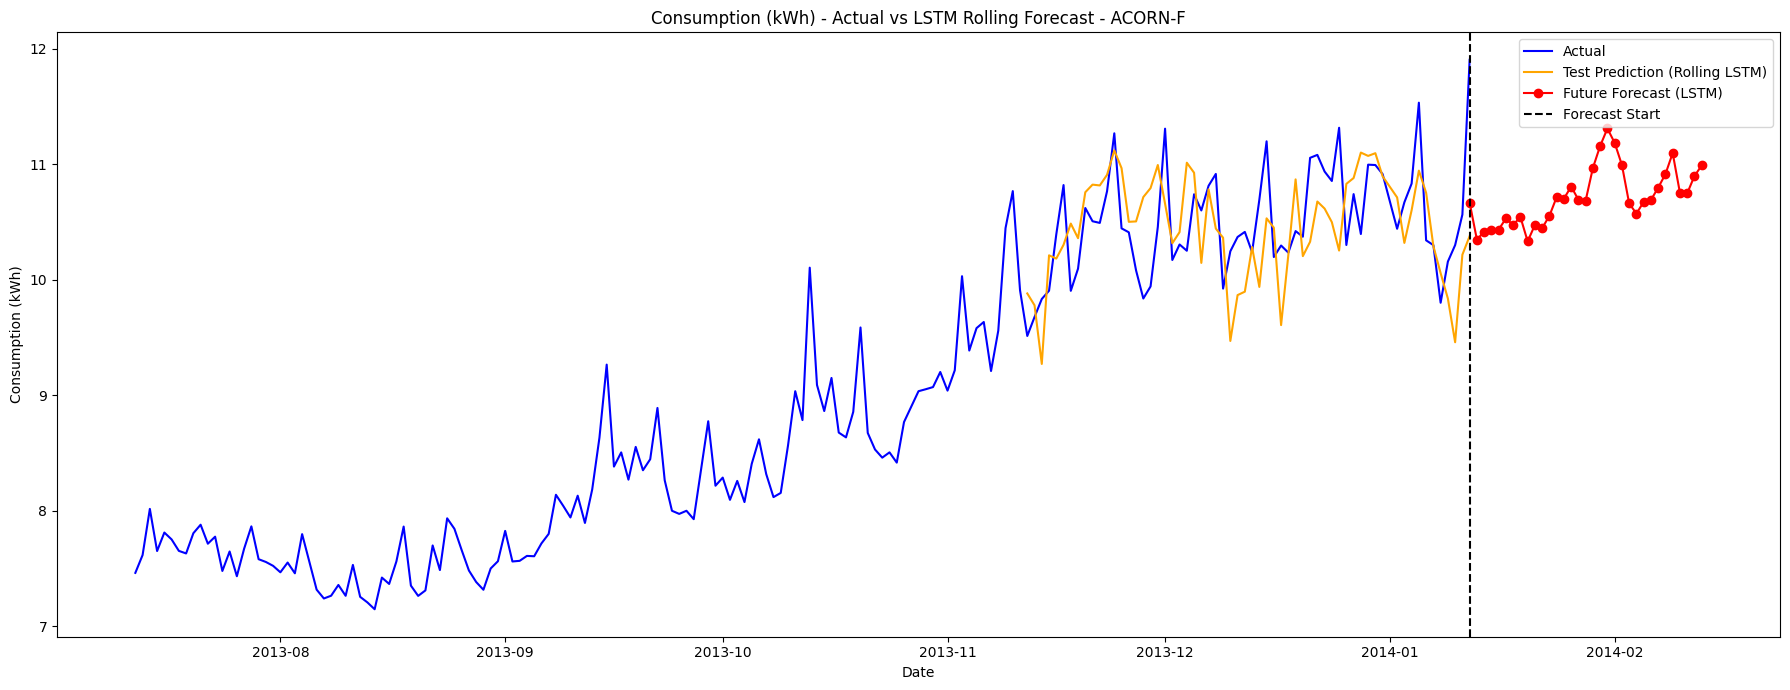

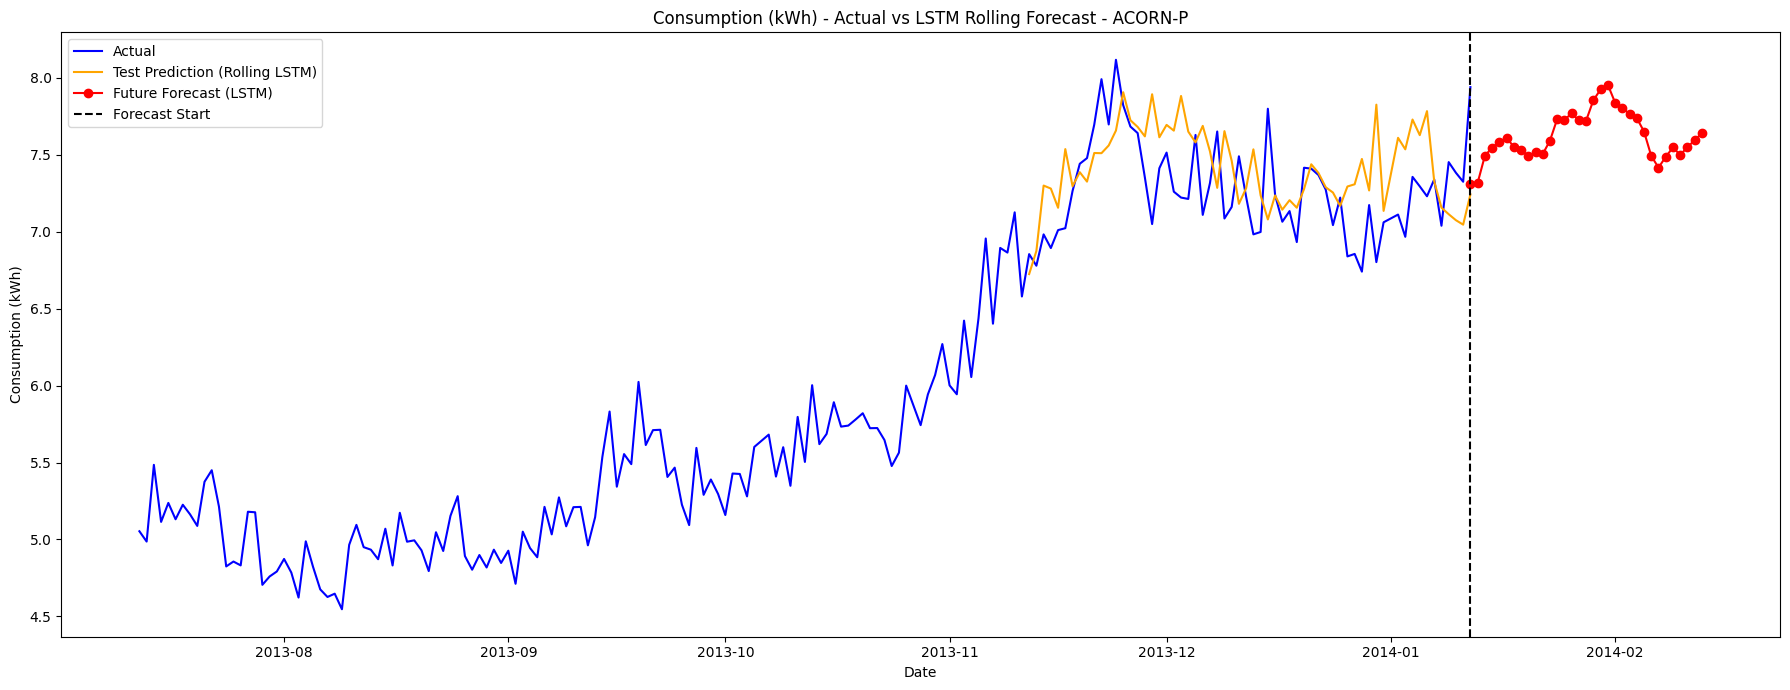

In [359]:
from datetime import timedelta

# Plot for each ACORN group: 6 months before the prediction period, test, and rolling forecast
for acorn_label in ['ACORN-C', 'ACORN-F', 'ACORN-P']:
    # Get the future forecast and test results
    y_future = future_forecasts_lstmRF_df[acorn_label]
    test_res = results_lstmRF[acorn_label]
    
    # Get the test DataFrame for this group
    idx = ['ACORN-C', 'ACORN-F', 'ACORN-P'].index(acorn_label)
    test_df_group = dfs_test[idx]
    train_df_group = dfs_train[idx]
    
    # Define the plotting window: 6 months before the first prediction
    plot_start = y_future.index[0] - pd.DateOffset(months=6)
    plot_end = y_future.index[-1]
    
    # Concatenate train and test for the full actual series
    full_df = pd.concat([train_df_group, test_df_group])
    full_df = full_df.sort_index()
    mask = (full_df.index >= plot_start) & (full_df.index <= plot_end)
    full_df_plot = full_df.loc[mask]
    
    # For test predictions (results_lstmRF), align with test dates
    test_pred_dates = test_df_group.index[-len(test_res['y_pred']):]
    y_pred_test = pd.Series(test_res['y_pred'], index=test_pred_dates)
    
    plt.figure(figsize=(18, 7))
    plt.plot(full_df_plot.index, full_df_plot['Conso_kWh'], label='Actual', color='blue')
    plt.plot(y_pred_test.index, y_pred_test.values, label='Test Prediction (Rolling LSTM)', color='orange')
    plt.plot(y_future.index, y_future.values, label='Future Forecast (LSTM)', color='red', marker='o')
    plt.axvline(y_future.index[0], color='black', linestyle='--', label='Forecast Start')
    plt.title(f'Consumption (kWh) - Actual vs LSTM Rolling Forecast - {acorn_label}')
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# SARIMAX model


c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Melhores parâmetros para ACORN-C: order=(1, 1, 1), seasonal_order=(0, 1, 1, 14), AIC=689.05


c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results w

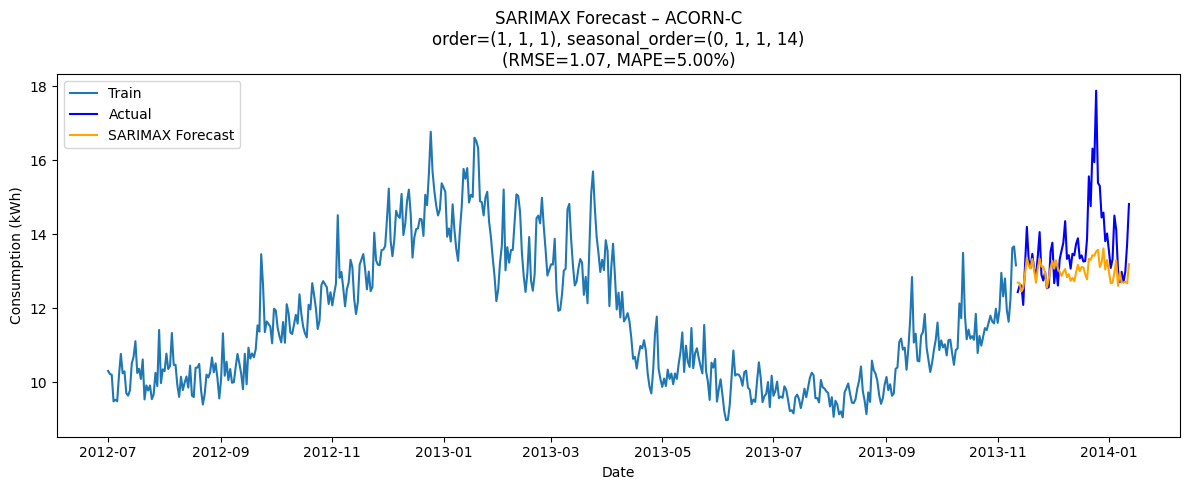

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Melhores parâmetros para ACORN-F: order=(1, 0, 2), seasonal_order=(1, 0, 1, 7), AIC=212.19


c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


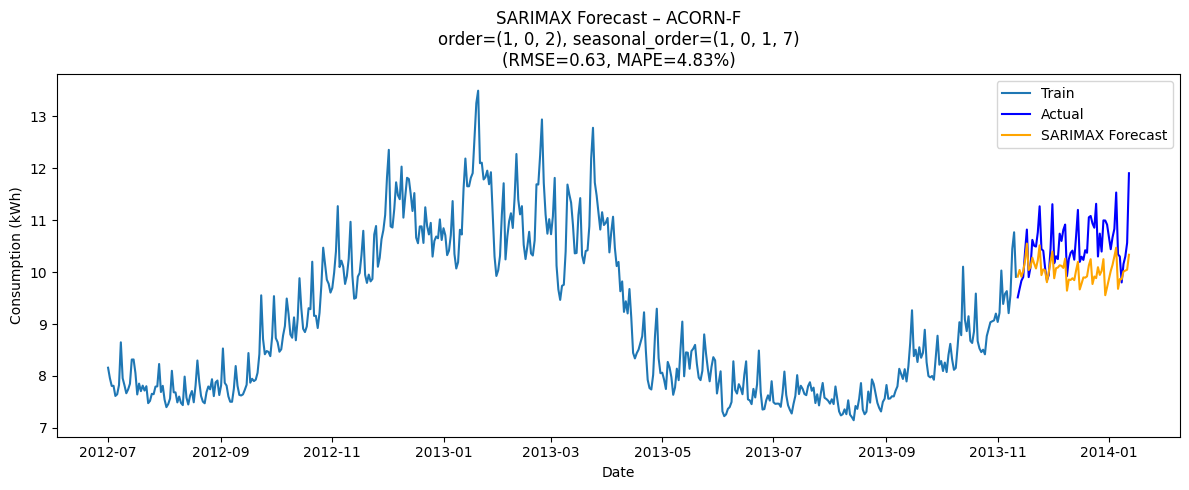

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Melhores parâmetros para ACORN-P: order=(1, 0, 1), seasonal_order=(1, 0, 1, 7), AIC=61.32


c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


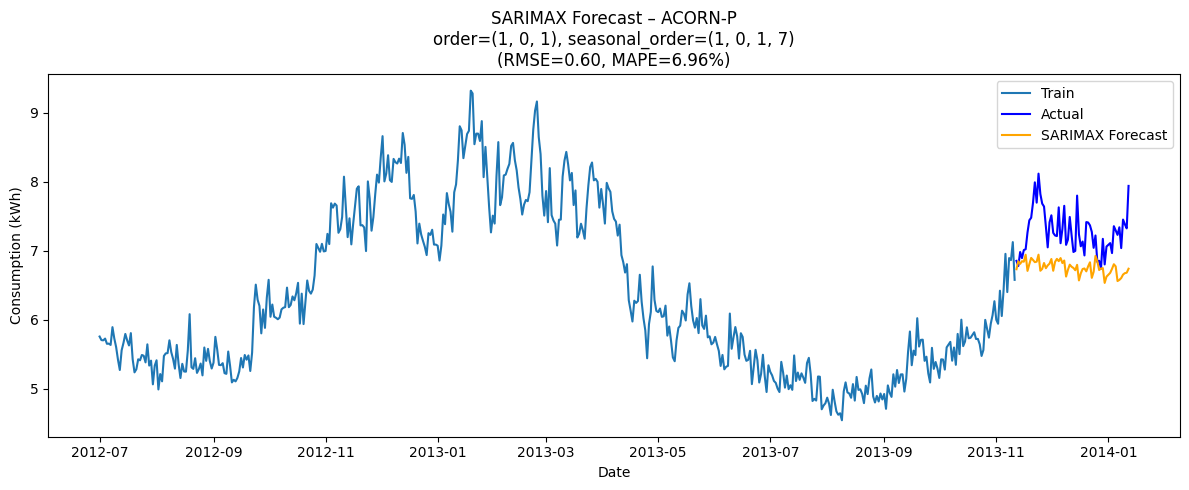

In [360]:
import itertools

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ---------------------------------------------------
# 1) Defina o ColumnTransformer
# ---------------------------------------------------

# Exemplo: já se sabe que X_train e X_test terão colunas numéricas e categóricas/booleanas
# 'is_holiday' já virou int, então faz parte de numerical_features.

numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"  # descarta qualquer coluna que não esteja em numerical_features ou categorical_features
)

# ---------------------------------------------------
# 2) Defina o grid de hiperparâmetros SARIMAX
# ---------------------------------------------------

p = [1]
d = [0, 1]
q = [1, 2]

P = [0, 1]
D = [0, 1]
Q = [1]

seasonal_periods = {
    'ACORN-C': [14],
    'ACORN-F': [7],
    'ACORN-P': [7]
}

labels = ['ACORN-C', 'ACORN-F', 'ACORN-P']

# Supondo que dfs_train e dfs_test são listas na mesma ordem que labels
dfs_train_dict = {lbl: df for lbl, df in zip(labels, dfs_train)}
dfs_test_dict  = {lbl: df for lbl, df in zip(labels, dfs_test)}

results_sarimax = {}
sarimax_models = {}

for acorn_label in labels:
    # ---------------------------------------------------
    # 3) Separe endogênas e exógenas brutas (X) para treino e teste
    # ---------------------------------------------------
    train_df = dfs_train_dict[acorn_label].copy()
    test_df  = dfs_test_dict[acorn_label].copy()

    # target
    endog_train = train_df['Conso_kWh']
    
    # exógenas brutas
    X_train = train_df.drop(columns=['Conso_kWh'])
    X_test  = test_df.drop(columns=['Conso_kWh'])

    # Garantir que is_holiday está no dtype correto (int)
    X_train['is_holiday'] = X_train['is_holiday'].astype(int)
    X_test['is_holiday']  = X_test['is_holiday'].astype(int)

    # ---------------------------------------------------
    # 4) Aplique o pré‐processamento: fit em X_train, transform em X_train e X_test
    # ---------------------------------------------------

    # Ajusta o preprocessor apenas em X_train
    preprocessor.fit(X_train)

    # Transforma X_train e X_test num array NumPy
    exog_train = preprocessor.transform(X_train)
    exog_test  = preprocessor.transform(X_test)

    # ---------------------------------------------------
    # 5) Grid‐search de SARIMAX usando exog_train
    # ---------------------------------------------------
    best_aic = np.inf
    best_order = None
    best_seasonal_order = None

    for (pi, di, qi) in itertools.product(p, d, q):
        for (Pi, Di, Qi) in itertools.product(P, D, Q):
            for s in seasonal_periods[acorn_label]:
                try:
                    model = SARIMAX(
                        endog_train,
                        exog=exog_train,
                        order=(pi, di, qi),
                        seasonal_order=(Pi, Di, Qi, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    fit = model.fit(disp=False)
                    aic = fit.aic

                    if aic < best_aic:
                        best_aic = aic
                        best_order = (pi, di, qi)
                        best_seasonal_order = (Pi, Di, Qi, s)

                except Exception:
                    # Caso falhe (não convergência, parâmetros inválidos etc.), pule esta combinação
                    continue

    print(
        f"Melhores parâmetros para {acorn_label}: "
        f"order={best_order}, seasonal_order={best_seasonal_order}, AIC={best_aic:.2f}"
    )

    # ---------------------------------------------------
    # 6) Reajuste o modelo com os melhores parâmetros (usando exog_train)
    # ---------------------------------------------------
    final_model = SARIMAX(
        endog_train,
        exog=exog_train,
        order=best_order,
        seasonal_order=best_seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    final_fit = final_model.fit(disp=False)
    sarimax_models[acorn_label] = final_fit

    # ---------------------------------------------------
    # 7) Forecast no conjunto de teste (passando exog_test)
    # ---------------------------------------------------
    n_forecast = len(test_df)
    forecast = final_fit.get_forecast(steps=n_forecast, exog=exog_test)
    y_pred = forecast.predicted_mean
    y_pred.index = test_df.index

    rmse = np.sqrt(mean_squared_error(test_df['Conso_kWh'], y_pred))
    mape = mean_absolute_percentage_error(test_df['Conso_kWh'], y_pred) * 100

    results_sarimax[acorn_label] = {
        'y_true': test_df['Conso_kWh'].values,
        'y_pred': y_pred.values,
        'rmse': rmse,
        'mape': mape,
        'best_order': best_order,
        'best_seasonal_order': best_seasonal_order,
        'model': final_fit
    }

    # ---------------------------------------------------
    # 8) Plot: treino vs real vs previsão
    # ---------------------------------------------------
    plt.figure(figsize=(12, 5))
    plt.plot(train_df.index, train_df['Conso_kWh'], label='Train')
    plt.plot(test_df.index,  test_df['Conso_kWh'],  label='Actual', color='blue')
    plt.plot(test_df.index,  y_pred,                label='SARIMAX Forecast', color='orange')
    plt.title(
        f"SARIMAX Forecast – {acorn_label}\n"
        f"order={best_order}, seasonal_order={best_seasonal_order}\n"
        f"(RMSE={rmse:.2f}, MAPE={mape:.2f}%)"
    )
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()




c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


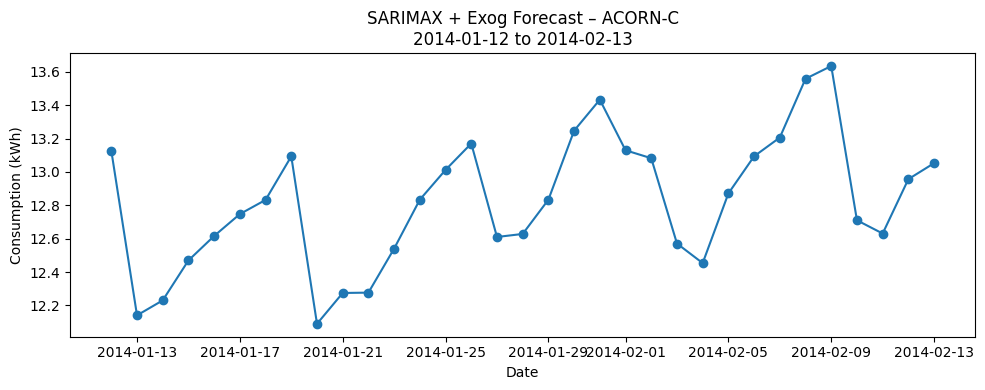

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


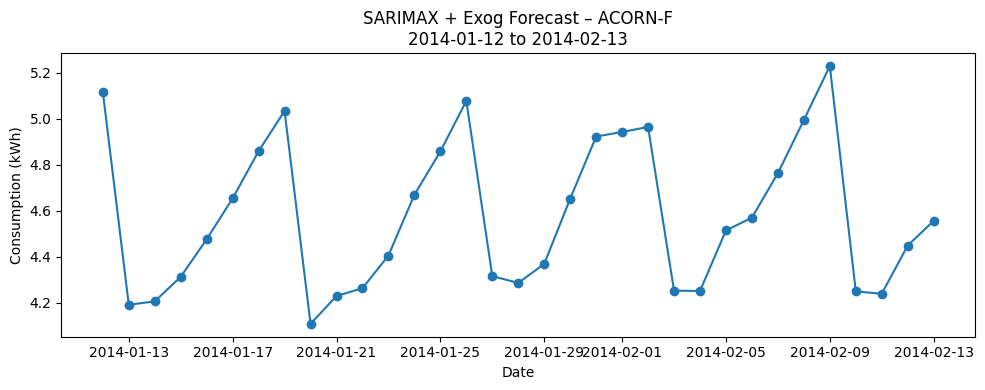

c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gusta\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


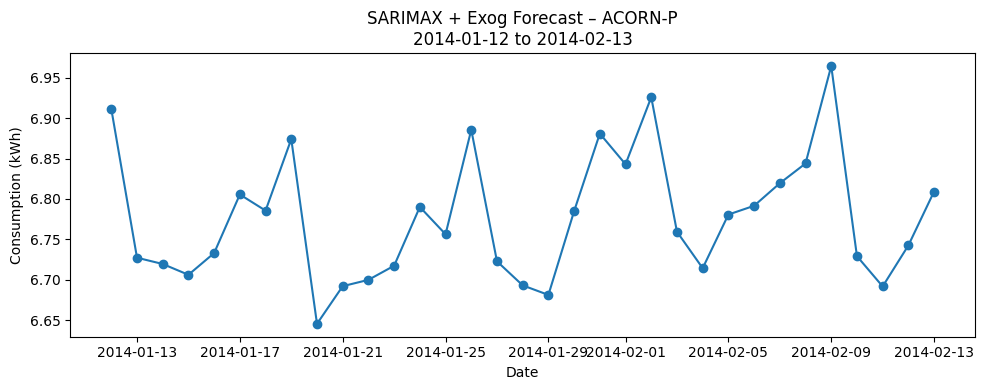

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Define the future date range
future_start = pd.to_datetime('2014-01-12')
future_end   = pd.to_datetime('2014-02-13')
future_dates = pd.date_range(start=future_start, end=future_end, freq='D')
n_future = len(future_dates)

# 2) Build df_future_exog so that it has exactly the same columns as X_train before preprocessing:
#    – It must include all numerical_features + categorical_features, and no extras.
df_future_exog = df_weather_future.reindex(future_dates).copy()

# 2a) Add the "Acorn" column (string) so ColumnTransformer sees the same feature names
#     that were used during training. We fill every row with the current label below.
#     Here, we’ll do this inside the loop for each ACORN model.

# 2b) Drop anything not in numerical_features + categorical_features:
extra_cols = set(df_future_exog.columns) - set(numerical_features + categorical_features)
if extra_cols:
    df_future_exog = df_future_exog.drop(columns=list(extra_cols))

# 2c) Ensure any boolean/flag columns have the same dtype (e.g. 'is_holiday' → int)
if 'is_holiday' in df_future_exog.columns:
    df_future_exog['is_holiday'] = df_future_exog['is_holiday'].astype(int)

# 3) Now loop over each saved SARIMAXResults in sarimax_models:
future_forecasts = {}

for acorn_label, fitted_model in sarimax_models.items():
    # 3a) Make a copy and insert the Acorn column with the current label:
    df_fe = df_future_exog.copy()
    df_fe['Acorn'] = acorn_label

    # 3b) Now drop anything still extra (e.g. if ‘Acorn’ wasn’t in categorical_features)
    extra_cols = set(df_fe.columns) - set(numerical_features + categorical_features)
    if extra_cols:
        df_fe = df_fe.drop(columns=list(extra_cols))

    # 3c) Ensure again that boolean flags are correct dtype
    if 'is_holiday' in df_fe.columns:
        df_fe['is_holiday'] = df_fe['is_holiday'].astype(int)

    # 3d) Transform with the fitted ColumnTransformer:
    exog_future = preprocessor.transform(df_fe)

    # 4) Use get_forecast(steps=..., exog=...) to generate n_future out‐of‐sample forecasts.
    #    This avoids any “start/end index” mismatch because we supply only the number of steps.
    forecast_obj = fitted_model.get_forecast(steps=n_future, exog=exog_future)
    y_forecast = forecast_obj.predicted_mean

    # 5) Assign future_dates as the new index
    y_forecast.index = future_dates
    future_forecasts[acorn_label] = y_forecast

    # 6) Plot for verification
    plt.figure(figsize=(10, 4))
    plt.plot(y_forecast.index, y_forecast.values, marker='o')
    plt.title(f"SARIMAX + Exog Forecast – {acorn_label}\n"
              f"{future_start.date()} to {future_end.date()}")
    plt.xlabel('Date')
    plt.ylabel('Consumption (kWh)')
    plt.tight_layout()
    plt.show()




In [348]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming results_sarimax dict already exists with keys 'y_true' and 'y_pred' for each ACORN
metrics_summary = {}

for acorn_label, res in results_sarimax.items():
    y_true = res['y_true']
    y_pred = res['y_pred']
    
    # Compute MSE, RMSE, and MAPE
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    metrics_summary[acorn_label] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

# Print the metrics for each ACORN
for acorn_label, met in metrics_summary.items():
    print(f"{acorn_label}: MSE={met['MSE']:.3f}, RMSE={met['RMSE']:.3f}, MAPE={met['MAPE']:.2f}%")


ACORN-C: MSE=1.147, RMSE=1.071, MAPE=5.00%
ACORN-F: MSE=0.399, RMSE=0.631, MAPE=4.83%
ACORN-P: MSE=0.355, RMSE=0.596, MAPE=6.96%


# Data prediction 


In [363]:
# Save the LSTM rolling forecast results to parquet
future_forecasts_lstmRF_df.to_parquet('data/02_processed/parquet/group_4_daily_predict_lstm.parquet')
future_forecasts_lstmRF_df.to_csv('data/02_processed/csv/group_4_daily_predict_lstm.csv')
